In [1]:
import torch


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path/'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} already exists')
else:
    print(f'Downloading {image_path}...')
    image_path.mkdir(parents=True, exist_ok=True)



data\pizza_steak_sushi already exists


In [4]:
import os

def walk_through_dir(dir_path):
    """goes through dir_pth"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'Found {len(dirnames)} directories and {len(filenames)} files in {dirpath}')


In [5]:
dir_path = Path('data/pizza_steak_sushi')az

In [6]:
walk_through_dir(dir_path)

Found 2 directories and 0 files in data\pizza_steak_sushi
Found 3 directories and 0 files in data\pizza_steak_sushi\test
Found 0 directories and 25 files in data\pizza_steak_sushi\test\pizza
Found 0 directories and 19 files in data\pizza_steak_sushi\test\steak
Found 0 directories and 31 files in data\pizza_steak_sushi\test\sushi
Found 3 directories and 0 files in data\pizza_steak_sushi\train
Found 0 directories and 78 files in data\pizza_steak_sushi\train\pizza
Found 0 directories and 75 files in data\pizza_steak_sushi\train\steak
Found 0 directories and 72 files in data\pizza_steak_sushi\train\sushi


In [7]:
#setup train and test directories
train_dir = dir_path/'train'
test_dir = dir_path/'test'

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [8]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

Image shape: (512, 512)
Image class: pizza
Image datatype: JPEG
Image mode: RGB
Image number of channels: 3
Image bands: ('R', 'G', 'B')
Image width: 512
Image height: 512
Image size: (512, 512)


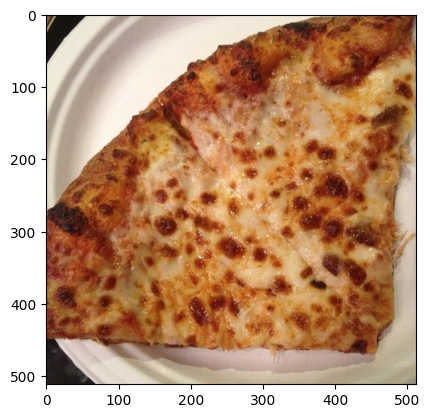

In [9]:
#visualize data
import random

# random.seed(42)

#get all the file paths
image_paths= list(image_path.glob('*/*/*.jpg'))
#pick random image
random_image = random.choice(image_paths)
#get class name
image_class = random_image.parent.stem
#view image
img=Image.open(random_image)
plt.imshow(img)
print(f'Image shape: {img.size}')
print(f'Image class: {image_class}')
print(f'Image datatype: {img.format}')
print(f'Image mode: {img.mode}')
print(f'Image number of channels: {len(img.getbands())}')
print(f'Image bands: {img.getbands()}')
print(f'Image width: {img.width}')
print(f'Image height: {img.height}')
print(f'Image size: {img.size}')



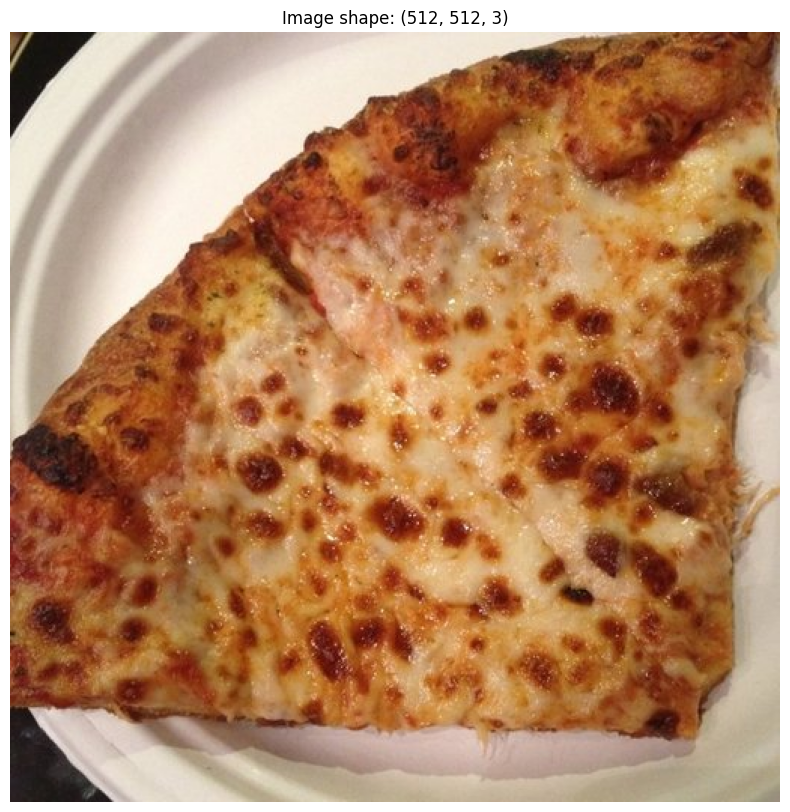

In [10]:
import numpy as np
img_as_array = np.array(img)
#plot image array
plt.figure(figsize=(10,10))
plt.imshow(img_as_array)
plt.title(f'Image shape: {img_as_array.shape}')
plt.axis(False);

In [11]:
img_as_array

array([[[109,  72,  30],
        [114,  76,  39],
        [108,  71,  42],
        ...,
        [109,  59,  36],
        [101,  54,  28],
        [112,  65,  37]],

       [[124,  87,  45],
        [115,  80,  42],
        [108,  71,  42],
        ...,
        [110,  62,  39],
        [110,  63,  37],
        [115,  70,  41]],

       [[130,  95,  53],
        [120,  85,  47],
        [115,  79,  47],
        ...,
        [108,  62,  39],
        [119,  73,  49],
        [122,  78,  51]],

       ...,

       [[ 41,  31,  32],
        [ 42,  32,  33],
        [ 43,  33,  34],
        ...,
        [154, 143, 125],
        [153, 141, 125],
        [153, 141, 125]],

       [[ 42,  32,  33],
        [ 42,  32,  33],
        [ 42,  32,  33],
        ...,
        [155, 143, 127],
        [155, 143, 127],
        [154, 142, 126]],

       [[ 42,  32,  33],
        [ 41,  31,  32],
        [ 41,  31,  32],
        ...,
        [155, 143, 127],
        [154, 142, 126],
        [154, 142, 126]]

In [12]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models


In [13]:
#write a transformer to convert images to tensors
data_transform = transforms.Compose([
    #resize image to 64x64
    transforms.Resize((64,64)),
    #flip image horizontally
    transforms.RandomHorizontalFlip(p=0.5),
    #flip image vertically
    transforms.RandomVerticalFlip(p=0.5),
    #transform image to tensor
    transforms.ToTensor()
])

In [14]:
data_transform(img)#img is the true image

tensor([[[0.1569, 0.1412, 0.1294,  ..., 0.6745, 0.6471, 0.6157],
         [0.1529, 0.1373, 0.1255,  ..., 0.6784, 0.6784, 0.6667],
         [0.1529, 0.1373, 0.1333,  ..., 0.7098, 0.6941, 0.6902],
         ...,
         [0.3098, 0.0980, 0.0824,  ..., 0.4235, 0.3765, 0.4863],
         [0.4118, 0.1961, 0.0824,  ..., 0.4627, 0.4157, 0.4118],
         [0.4196, 0.3333, 0.1098,  ..., 0.4471, 0.4549, 0.3961]],

        [[0.1255, 0.1216, 0.1098,  ..., 0.6471, 0.6196, 0.5804],
         [0.1255, 0.1176, 0.1098,  ..., 0.6392, 0.6392, 0.6353],
         [0.1176, 0.1098, 0.1098,  ..., 0.6706, 0.6510, 0.6510],
         ...,
         [0.2706, 0.0902, 0.0784,  ..., 0.1922, 0.1647, 0.3490],
         [0.3412, 0.1725, 0.0784,  ..., 0.2314, 0.1922, 0.2549],
         [0.3098, 0.2824, 0.0902,  ..., 0.2196, 0.2275, 0.2078]],

        [[0.1294, 0.1137, 0.0980,  ..., 0.5333, 0.5216, 0.4980],
         [0.1373, 0.1176, 0.0980,  ..., 0.5255, 0.5333, 0.5294],
         [0.1255, 0.1176, 0.1098,  ..., 0.5686, 0.5451, 0.

In [15]:
data_transform(img).shape

torch.Size([3, 64, 64])

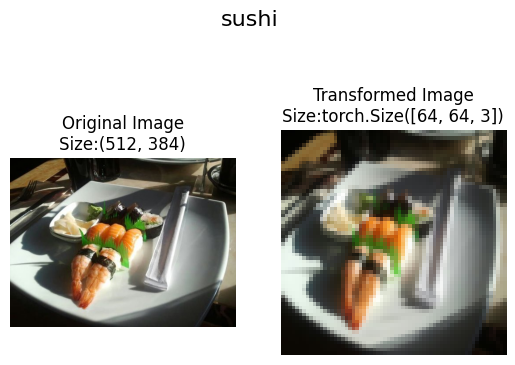

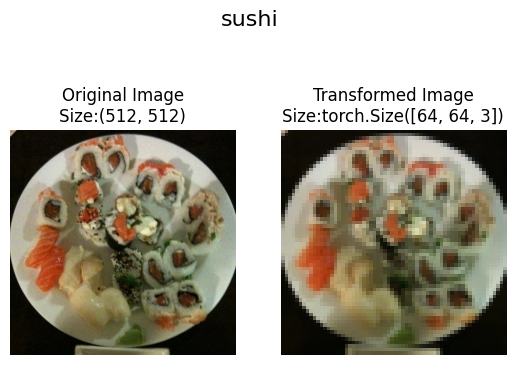

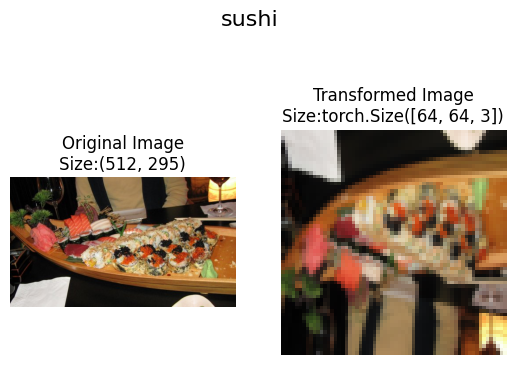

In [16]:
def plot_transformed_image(image_paths,transform,n=3):
    """
    plots n images transformed by transform
    """
    random_image_paths = random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig , ax = plt.subplots (nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original Image\nSize:{f.size}')
            ax[0].axis(False)

            #transform image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed Image\nSize:{transformed_image.shape}')
            ax[1].axis(False)
            fig.suptitle(f'{image_path.parent.stem}',fontsize=16)

plot_transformed_image(image_paths,data_transform,n=3)
        

In [17]:
#loading images
from torchvision.datasets import ImageFolder
train_data = ImageFolder(train_dir,transform=data_transform)
test_data = ImageFolder(test_dir,transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
#get class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [19]:
#get class names as dictionary
class_names_dict = train_data.class_to_idx
class_names_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
#get class length
len(train_data),len(test_data)

(225, 75)

[train_data[0] returns one image and its label]
[train_data[0][0] returns the first image]
[train_data[0][1] returns the first image's label]

In [21]:
img,label = train_data[90][0],train_data[90][1]
print(f'Image shape: {img.shape}')
print(f'Image label: {label}')
print(f'Image class name: {class_names[label]}')
print(f'image datatype: {img.dtype}')

Image shape: torch.Size([3, 64, 64])
Image label: 1
Image class name: steak
image datatype: torch.float32


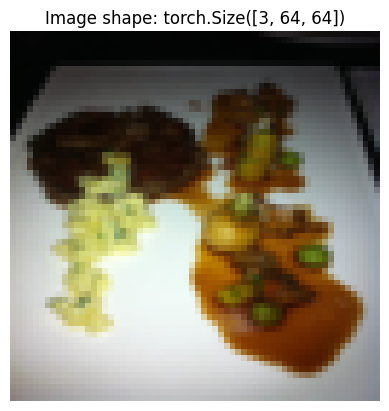

In [22]:
#plot image
plt.imshow(img.permute(1,2,0))
plt.title(f'Image shape: {img.shape}')
plt.axis(False);

In [23]:
os.cpu_count()

16

In [24]:
#setup data loaders
BATCH_SIZE = 32
NUM_WORKERS = 16
train_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=NUM_WORKERS,pin_memory=True)
test_loader = DataLoader(test_data,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS,pin_memory=True)

In [25]:
train_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x1d33cf45ba0>,
 <torch.utils.data.dataloader.DataLoader at 0x1d33a9ec370>)

In [26]:
len(train_loader),len(test_loader)

(8, 3)

In [27]:
img,label = next(iter(train_loader))

In [28]:
print(f'Image shape: {img.shape}||| Label shape: {label.shape}')

Image shape: torch.Size([32, 3, 64, 64])||| Label shape: torch.Size([32])


(-0.5, 63.5, 63.5, -0.5)

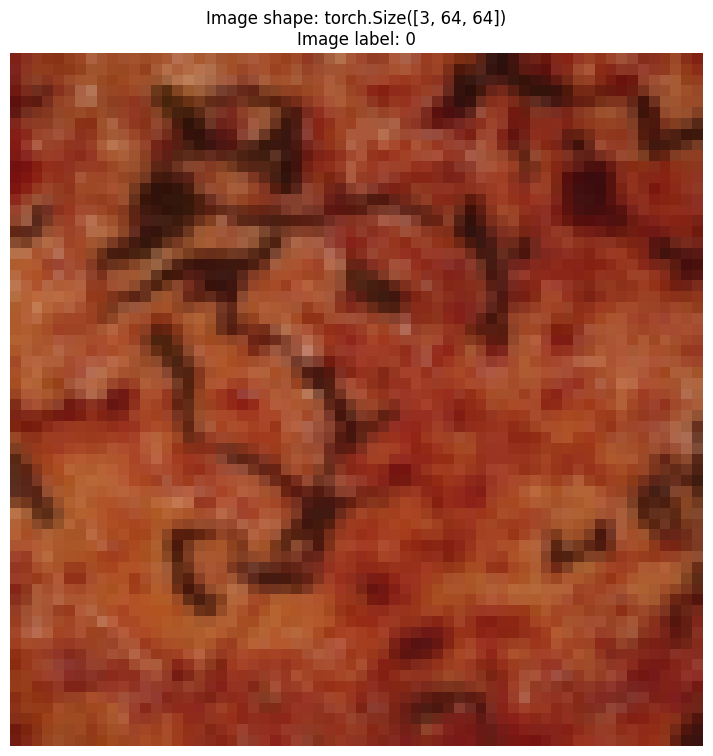

In [29]:
plt.figure(figsize=(9,9))
plt.imshow(img[1].permute(1,2,0))
plt.title(f'Image shape: {img[1].shape}\nImage label: {label[1]}')
plt.axis(False)


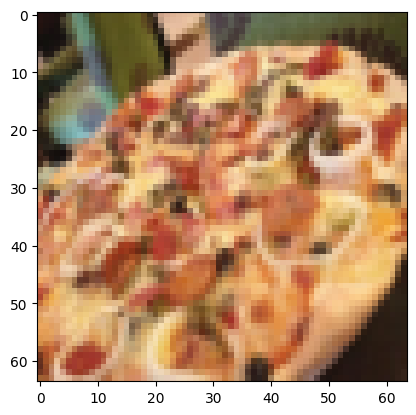

In [30]:
plt.imshow(test_data[1][0].permute(1,2,0))

CASTOM DATALOADER